In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
csv_np_input = 'national_parks_clean_with_zip.csv'
csv_np_number_of_trails = 'np_number_of_trails.csv'
csv_all_park_trails = 'complete_list_of_all_trails_for_all_parks.csv'
# Import API key
from config import api_key

base_url = 'https://www.hikingproject.com/data/get-trails?'

#this is the most trails that can be returned from an API call at thehiking project
maxResults = 500

In [2]:
#this is what you need to do to prevent an import from adding an index.
park_df = pd.read_csv(csv_np_input, index_col = 0)


Method: getTrails

Returns trails for a given query.

Required Arguments:

key - Your private key

lat - Latitude for a given area

lon - Longitude for a given area

Optional Arguments:

maxDistance - Max distance, in miles, from lat, lon. Default: 30. Max: 200.

maxResults - Max number of trails to return. Default: 10. Max: 500.

sort - Values can be 'quality', 'distance'. Default: quality.

minLength - Min trail length, in miles. Default: 0 (no minimum).

minStars - Min star rating, 0-4. Default: 0.

Example:

https://www.hikingproject.com/data/get-trails?lat=40.0274&lon=-105.2519&maxDistance=10&key=200374562-8acd37f44e1bf5bdb6381ee96b8ab81a

Notes:

All returned fields will always be defined, but optional fields may be empty.


In [3]:
trail_per_park_df = park_df

In [4]:
park_name = []
trail_id = []
name = []
trail_type = []
summary = []
difficulty = []
stars = []
starVotes = []
location = []
url = []
imgSqSmall = []
imgSmall = []
imgSmallMed = []
imgMedium = []
length = []
ascent = []
descent = []
high = []
low = []
longitude = []
latitude = []
conditionStatus = []
conditionDetails = []
conditionDate = []

In [5]:
trail_per_park_df['radius for trail'] = 0
trail_per_park_df['number of trails'] = 0

In [6]:
trail_per_park_df['Name']

0                           Acadia
1                           Arches
2                         Badlands
3                         Big Bend
4                         Biscayne
5     Black Canyon of The Gunnison
6                     Bryce Canyon
7                      Canyonlands
8                     Capitol Reef
9                 Carlsbad Caverns
10                 Channel Islands
11                        Congaree
12                     Crater Lake
13                 Cuyahoga Valley
14                    Death Valley
15                          Denali
16                    Dry Tortugas
17                      Everglades
18             Gates of The Arctic
19                    Gateway Arch
20                         Glacier
21                     Glacier Bay
22                    Grand Canyon
23                     Grand Teton
24                     Great Basin
25                Great Sand Dunes
26           Great Smoky Mountains
27             Guadalupe Mountains
28                  

In [7]:
trail_per_park_df

,Name,Location,coordinates,lat,lon,Date established as park,"Area, acres","area, acres","area, km^2",Recreation visitors,Description,national park full name,State,Park Designation,Park Code,postalCode,radius for trail,number of trails
0,Acadia,Maine,44.35°N 68.21°W,44.3500,-68.2100,26-Feb-19,"49,076.63 acres (198.6 km2)","49,076.63",198.6,"3,537,575",Covering most of Mount Desert Island and other...,Acadia National Park,ME,National Park,acad,04609,0,0
1,Arches,Utah,38.68°N 109.57°W,38.6800,-109.5700,12-Nov-71,"76,678.98 acres (310.3 km2)","76,678.98",310.3,"1,663,557","This site features more than 2,000 natural san...",Arches National Park,UT,National Park,arch,84532,0,0
2,Badlands,South Dakota,43.75°N 102.50°W,43.7500,-102.5000,10-Nov-78,"242,755.94 acres (982.4 km2)","242,755.94",982.4,"1,008,942","The Badlands are a collection of buttes, pinna...",Badlands National Park,SD,National Park,badl,57750,0,0
3,Big Bend,Texas,29.25°N 103.25°W,29.2500,-103.2500,12-Jun-44,"801,163.21 acres (3,242.2 km2)","801,163.21","3,242.20","440,091",Named for the prominent bend in the Rio Grande...,Big Bend National Park,TX,National Park,bibe,79834,0,0
4,Biscayne,Florida,25.65°N 80.08°W,25.6500,-80.0800,28-Jun-80,"172,971.11 acres (700.0 km2)","172,971.11",700,"469,253","Located in Biscayne Bay, this park at the nort...",Biscayne National Park,FL,National Park,bisc,33033,0,0
5,Black Canyon of The Gunnison,Colorado,38.57°N 107.72°W,38.5700,-107.7200,21-Oct-99,"30,779.83 acres (124.6 km2)","30,779.83",124.6,"308,962",The park protects a quarter of the Gunnison Ri...,Black Canyon Of The Gunnison National Park,CO,National Park,blca,81401,0,0
6,Bryce Canyon,Utah,37.57°N 112.18°W,37.5700,-112.1800,25-Feb-28,"35,835.08 acres (145.0 km2)","35,835.08",145,"2,679,478",Bryce Canyon is a geological amphitheater on t...,Bryce Canyon National Park,UT,National Park,brca,84764,0,0
7,Canyonlands,Utah,38.2°N 109.93°W,38.2000,-109.9300,12-Sep-64,"337,597.83 acres (1,366.2 km2)","337,597.83","1,366.20","739,449",This landscape was eroded into a maze of canyo...,Canyonlands National Park,UT,National Park,cany,84532,0,0
8,Capitol Reef,Utah,38.20°N 111.17°W,38.2000,-111.1700,18-Dec-71,"241,904.50 acres (979.0 km2)","241,904.50",979,"1,227,627",The park's Waterpocket Fold is a 100-mile (160...,Capitol Reef National Park,UT,National Park,care,84775,0,0
9,Carlsbad Caverns,New Mexico,32.17°N 104.44°W,32.1700,-104.4400,14-May-30,"46,766.45 acres (189.3 km2)","46,766.45",189.3,"465,912","Carlsbad Caverns has 117 caves, the longest of...",Carlsbad Caverns National Park,NM,National Park,cave,88220,0,0


In [8]:
for park in trail_per_park_df['Name']:
    #### find a particular park
    #get surface are of park.  some of the values have ',' that need removed
    area_km2 = np.float32(park_df.loc[park_df['Name'] == park, 'area, km^2'].values[0].replace(',',''))
    # determine approximate radius of park
    park_radius_km = np.sqrt(area_km2 / np.pi)
    park_radius_km
    #set trail search area to be 2 x the radius of the park area
    maxDistance = 2 * park_radius_km / 1.61
    lat = park_df.loc[park_df['Name'] == park, 'lat'].to_numpy().astype('float32')[0]
    lon = park_df.loc[park_df['Name'] == park, 'lon'].to_numpy().astype('float32')[0]
    sort = 'distance' #can be 'quality' or 'distance'
    minLength = 0
    #don't want to limit trails based on anything
    minStars = 0
    full_url = base_url + 'lat='+str(lat) + '&lon=' + str(lon)+'&maxDistance='+str(maxDistance)+'&minLength='+str(minLength)+'&minStars='+str(minStars)+'&sort='+sort+'&maxResults=' + str(maxResults) + '&key='+ api_key 
    print(full_url)
    response=requests.get(full_url).json()
    trail_per_park_df.loc[trail_per_park_df['Name'] == park, 'radius for trail'] = maxDistance
    trail_per_park_df.loc[trail_per_park_df['Name'] == park,'number of trails'] = len(response['trails'])
    for i in range(len(response['trails'])):
        park_name.append(park)
        trail_id.append(response['trails'][i]['id'])
        name.append(response['trails'][i]['name'])
        trail_type.append(response['trails'][i]['type'])
        summary.append(response['trails'][i]['summary'])
        difficulty.append(response['trails'][i]['difficulty'])
        stars.append(response['trails'][i]['stars'])
        starVotes.append(response['trails'][i]['starVotes'])
        location.append(response['trails'][i]['location'])
        url.append(response['trails'][i]['url'])
        imgSqSmall.append(response['trails'][i]['imgSqSmall'])
        imgSmall.append(response['trails'][i]['imgSmall'])
        imgSmallMed.append(response['trails'][i]['imgSmallMed'])
        imgMedium.append(response['trails'][i]['imgMedium'])
        length.append(response['trails'][i]['length'])
        ascent.append(response['trails'][i]['ascent'])
        descent.append(response['trails'][i]['descent'])
        high.append(response['trails'][i]['high'])
        low.append(response['trails'][i]['low'])
        longitude.append(response['trails'][i]['longitude'])
        latitude.append(response['trails'][i]['latitude'])
        conditionStatus.append(response['trails'][i]['conditionStatus'])
        conditionDetails.append(response['trails'][i]['conditionDetails'])
        conditionDate.append(response['trails'][i]['conditionDate'])

https://www.hikingproject.com/data/get-trails?lat=44.35&lon=-68.21&maxDistance=9.87685804763798&minLength=0&minStars=0&sort=distance&maxResults=500&key=200374562-8acd37f44e1bf5bdb6381ee96b8ab81a
https://www.hikingproject.com/data/get-trails?lat=38.68&lon=-109.57&maxDistance=12.345823462408235&minLength=0&minStars=0&sort=distance&maxResults=500&key=200374562-8acd37f44e1bf5bdb6381ee96b8ab81a
https://www.hikingproject.com/data/get-trails?lat=43.75&lon=-102.5&maxDistance=21.967132297292654&minLength=0&minStars=0&sort=distance&maxResults=500&key=200374562-8acd37f44e1bf5bdb6381ee96b8ab81a
https://www.hikingproject.com/data/get-trails?lat=29.25&lon=-103.25&maxDistance=39.90699997437014&minLength=0&minStars=0&sort=distance&maxResults=500&key=200374562-8acd37f44e1bf5bdb6381ee96b8ab81a
https://www.hikingproject.com/data/get-trails?lat=25.65&lon=-80.08&maxDistance=18.54292335851505&minLength=0&minStars=0&sort=distance&maxResults=500&key=200374562-8acd37f44e1bf5bdb6381ee96b8ab81a
https://www.hikin

https://www.hikingproject.com/data/get-trails?lat=46.85&lon=-121.75&maxDistance=21.676759839426776&minLength=0&minStars=0&sort=distance&maxResults=500&key=200374562-8acd37f44e1bf5bdb6381ee96b8ab81a
https://www.hikingproject.com/data/get-trails?lat=48.7&lon=-121.2&maxDistance=31.676859116361783&minLength=0&minStars=0&sort=distance&maxResults=500&key=200374562-8acd37f44e1bf5bdb6381ee96b8ab81a
https://www.hikingproject.com/data/get-trails?lat=47.97&lon=-123.5&maxDistance=42.825723807242674&minLength=0&minStars=0&sort=distance&maxResults=500&key=200374562-8acd37f44e1bf5bdb6381ee96b8ab81a
https://www.hikingproject.com/data/get-trails?lat=35.07&lon=-109.78&maxDistance=20.97775251406428&minLength=0&minStars=0&sort=distance&maxResults=500&key=200374562-8acd37f44e1bf5bdb6381ee96b8ab81a
https://www.hikingproject.com/data/get-trails?lat=36.48&lon=-121.16&maxDistance=7.283515705385141&minLength=0&minStars=0&sort=distance&maxResults=500&key=200374562-8acd37f44e1bf5bdb6381ee96b8ab81a
https://www.hik

In [27]:
trail_per_park_df

,Name,Location,coordinates,lat,lon,Date established as park,"Area, acres","area, acres","area, km^2",Recreation visitors,Description,national park full name,State,Park Designation,Park Code,postalCode,radius for trail,number of trails
57,Yellowstone,"Wyoming, Montana, Idaho",44.60°N 110.50°W,44.6000,-110.5000,"March 1, 1872","2,219,790.71 acres (8,983.2 km2)","2,219,790.71","8,983.20","4,115,000","Situated on the Yellowstone Caldera, the park ...",Yellowstone National Park,WY,National Park,yell,82190,66.427013,500
26,Great Smoky Mountains,"North Carolina, Tennessee",35.68°N 83.53°W,35.6800,-83.5300,15-Jun-34,"522,426.88 acres (2,114.2 km2)","522,426.88","2,114.20","11,421,200","The Great Smoky Mountains, part of the Appalac...",Great Smoky Mountains National Park,TN,National Park,grsm,37738,32.225689,500
58,Yosemite,California,37.83°N 119.50°W,37.8300,-119.5000,"October 1, 1890","761,747.50 acres (3,082.7 km2)","761,747.50","3,082.70","4,009,436","Yosemite features sheer granite cliffs, except...",Yosemite National Park,CA,National Park,yose,95389,38.913009,425
48,Rocky Mountain,Colorado,40.40°N 105.58°W,40.4000,-105.5800,26-Jan-15,"265,807.25 acres (1,075.7 km2)","265,807.25","1,075.70","4,590,493",Bisected north to south by the Continental Div...,Rocky Mountain National Park,CO,National Park,romo,80517,22.986601,377
23,Grand Teton,Wyoming,43.73°N 110.80°W,43.7300,-110.8000,26-Feb-29,"310,044.36 acres (1,254.7 km2)","310,044.36","1,254.70","3,491,151",Grand Teton is the tallest mountain in the Tet...,Grand Teton National Park,WY,National Park,grte,83012,24.825564,307
20,Glacier,Montana,48.80°N 114.00°W,48.8000,-114.0000,11-May-10,"1,013,125.99 acres (4,100.0 km2)","1,013,125.99","4,100.00","2,965,309",The U.S. half of Waterton-Glacier Internationa...,Glacier National Park,MT,National Park,glac,59936,44.876720,242
36,Kings Canyon,California,36.80°N 118.55°W,36.8000,-118.5500,4-Mar-40,"461,901.20 acres (1,869.2 km2)","461,901.20","1,869.20","699,023",Home to several giant sequoia groves and the G...,Sequoia & Kings Canyon National Parks,CA,National Parks,seki,93271,30.301007,242
44,Olympic,Washington,47.97°N 123.50°W,47.9700,-123.5000,29-Jun-38,"922,649.41 acres (3,733.8 km2)","922,649.41","3,733.80","3,104,455","Situated on the Olympic Peninsula, this park i...",Olympic National Park,WA,National Park,olym,98362,42.825724,232
42,Mount Rainier,Washington,46.85°N 121.75°W,46.8500,-121.7500,"March 2, 1899","236,381.64 acres (956.6 km2)","236,381.64",956.6,"1,518,491","Mount Rainier, an active stratovolcano, is the...",Mount Rainier National Park,WA,National Park,mora,98304,21.676760,223
51,Shenandoah,Virginia,38.53°N 78.35°W,38.5300,-78.3500,26-Dec-35,"199,223.77 acres (806.2 km2)","199,223.77",806.2,"1,264,880",Shenandoah's Blue Ridge Mountains are covered ...,Shenandoah National Park,VA,National Park,shen,22835,19.899886,212


In [15]:
trail_per_park_df.to_csv(csv_np_number_of_trails, index = False)

In [10]:
all_park_trails_df = pd.DataFrame({'NP Name' : park_name , 'trail_id': trail_id,
'name' : name,
'trail_type' : trail_type,
'summary' : summary,
'difficulty' : difficulty,
'stars' : stars,
'starVotes' : starVotes,
'location' : location,
'url': url,
'imgSqSmall' : imgSqSmall,
'imgSmall' : imgSmall,
'imgSmallMed' : imgSmallMed,
'imgMedium' : imgMedium,
'length, miles' : length,
'ascent, ft': ascent,
'descent, ft' : descent,
'high, ft' : high,
'low, ft': low,
'latitude' : latitude,
'longitude' : longitude,
'conditionStatus' : conditionStatus,
'conditionDetails' : conditionDetails,
'conditionDate' : conditionDate})

In [11]:
all_park_trails_df

,NP Name,trail_id,name,trail_type,summary,difficulty,stars,starVotes,location,url,...,"length, miles","ascent, ft","descent, ft","high, ft","low, ft",latitude,longitude,conditionStatus,conditionDetails,conditionDate
0,Acadia,7019232,Precipice Loop,Recommended Route,An adventurous loop with brilliant views using...,black,4.7,32,"Bar Harbor, Maine",https://www.hikingproject.com/trail/7019232/pr...,...,2.3,1072,-1071,1042,127,44.3495,-68.1880,Unknown,None,1970-01-01 00:00:00
1,Acadia,7019354,Dorr Mountain Ladder Trail Loop,Recommended Route,An exciting loop up the Dorr Mountain Ladder ...,black,4.8,16,"Bar Harbor, Maine",https://www.hikingproject.com/trail/7019354/do...,...,3.4,1142,-1142,1248,114,44.3519,-68.2046,Unknown,None,1970-01-01 00:00:00
2,Acadia,7019235,Gorham Mountain Loop,Recommended Route,A short but challenging tour that passes a num...,blueBlack,4.7,44,"Bar Harbor, Maine",https://www.hikingproject.com/trail/7019235/go...,...,3.6,774,-781,522,37,44.3305,-68.1846,All Clear,Dry,2020-06-09 13:04:33
3,Acadia,7007506,Great Head Trail,Recommended Route,A great trail to escape the crowds at Sand Bea...,blue,4.6,50,"Bar Harbor, Maine",https://www.hikingproject.com/trail/7007506/gr...,...,1.5,232,-235,145,35,44.3297,-68.1805,Unknown,None,1970-01-01 00:00:00
4,Acadia,7039413,Cadillac Mountain Summit Loop,Recommended Route,Enjoy a scenic loop hike to the summit of Cadi...,black,4.4,14,"Bar Harbor, Maine",https://www.hikingproject.com/trail/7039413/ca...,...,4.9,1324,-1327,1515,203,44.3727,-68.2217,Unknown,None,1970-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804,Zion,7039707,Goosebump Connector,Trail,A simple connector between Goosebump and Jems.,blue,3.0,1,"Hurricane, Utah",https://www.hikingproject.com/trail/7039707/go...,...,1.7,0,-196,3954,3758,37.1624,-113.2267,Unknown,None,1970-01-01 00:00:00
5805,Zion,7001602,La Verkin Creek Trail,Trail,Head up La Verkin Creek to experience amazing ...,black,4.6,5,"Toquerville, Utah",https://www.hikingproject.com/trail/7001602/la...,...,10.9,1742,-1718,6411,5052,37.4522,-113.1914,All Clear,Mostly Dry,2020-04-01 19:47:34
5806,Zion,7035241,Hurricane Rim Trail,Trail,Fun rocky singletrack that meanders above the ...,black,4.0,1,"Hurricane, Utah",https://www.hikingproject.com/trail/7035241/hu...,...,6.4,553,-421,3789,3514,37.1833,-113.2780,Unknown,None,1970-01-01 00:00:00
5807,Zion,7037607,Goosebump,Trail,"A ""roller coaster"" of a trail.",blue,4.0,1,"Hurricane, Utah",https://www.hikingproject.com/trail/7037607/go...,...,3.6,219,-272,4025,3924,37.1519,-113.2519,Unknown,None,1970-01-01 00:00:00


In [103]:
all_park_trails_df.to_csv(csv_all_park_trails)

In [61]:
trail_per_park_df.sort_values(by = 'number of trails', ascending= False, inplace = True)

In [62]:
trail_per_park_df.rename(columns = {'Name' : 'National Park Name'} , inplace = True)

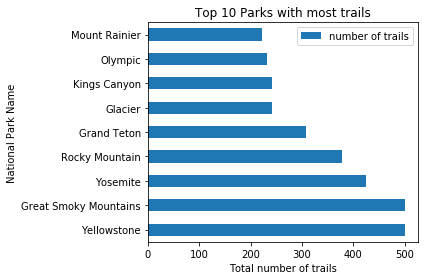

In [104]:
ax1 = trail_per_park_df[0:9].plot(x = 'National Park Name', y = 'number of trails' , kind = 'barh', title = 'Top 10 Parks with most trails')
ax1.set_xlabel('Total number of trails')
ax1.set_ylabel('National Park Name')
plt.savefig('./data_summary/parks_top_10_trail_count.png', bbox_inches='tight')
plt.tight_layout()


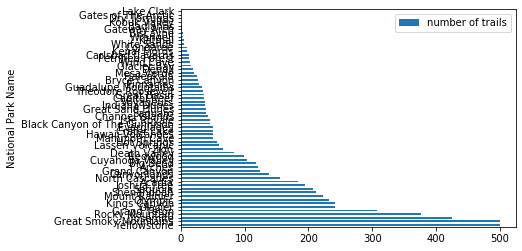

In [97]:
trail_per_park_df.plot(x = 'National Park Name', y = 'number of trails' , kind = 'barh')

In [94]:
trail_count_bin = [0 , 50 , 100 , 200 , 450 , 501]
trail_count_label = ['<50', '50 - 100', '100 - 200', '200 - 450' , '450 - 500' ]
trail_per_park_df['number of trails per park'] = pd.cut(trail_per_park_df['number of trails'], bins = trail_count_bin, labels = trail_count_label, right = False)
#trail_per_park_group_df =  trail_per_park_df.groupby(by = 'trail bin park count')['number of trails'].sum()
trail_per_park_group_df =  trail_per_park_df.groupby(by = 'number of trails per park').agg({'number of trails':['mean', 'count', 'sum']})
trail_per_park_group_df.columns = ['average number of trails', 'total number of parks' , 'total number of trails']
trail_per_park_group_df = trail_per_park_group_df[['total number of parks' , 'total number of trails' , 'average number of trails']]

In [98]:
trail_per_park_group_df

,total number of parks,total number of trails,average number of trails
number of trails per park,,,
<50,32,638,19.937500
50 - 100,9,565,62.777778
100 - 200,8,1139,142.375000
200 - 450,9,2467,274.111111
450 - 500,2,1000,500.000000


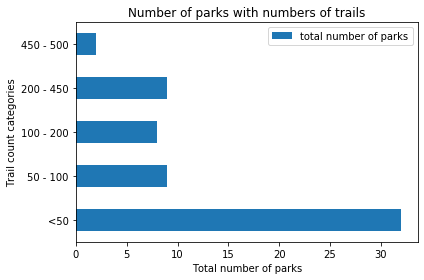

In [105]:
ax1 = trail_per_park_group_df.plot( y = 'total number of parks' , kind = 'barh', title = 'Number of parks with numbers of trails')
ax1.set_xlabel('Total number of parks')
ax1.set_ylabel('Trail count categories')
plt.savefig('./data_summary/trail_categories_by_park.png', bbox_inches='tight')
plt.tight_layout()
